## Importing dependencies

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Loading Dataset

In [75]:
df=pd.read_csv("SampleSuperstore.csv")
df

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9994 rows x 13 columns]

### Observing Features

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [77]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [78]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Preprocessing

In [79]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [80]:
df['Country'].unique()

array(['United States'], dtype=object)

The whole dataset consists of the retail datas only in US

In [81]:
#droping Country because only US
df.drop("Country",axis=1,inplace=True)
df

Ship Mode    Segment             City       State  Postal Code  \
0       Second Class   Consumer        Henderson    Kentucky        42420   
1       Second Class   Consumer        Henderson    Kentucky        42420   
2       Second Class  Corporate      Los Angeles  California        90036   
3     Standard Class   Consumer  Fort Lauderdale     Florida        33311   
4     Standard Class   Consumer  Fort Lauderdale     Florida        33311   
...              ...        ...              ...         ...          ...   
9989    Second Class   Consumer            Miami     Florida        33180   
9990  Standard Class   Consumer       Costa Mesa  California        92627   
9991  Standard Class   Consumer       Costa Mesa  California        92627   
9992  Standard Class   Consumer       Costa Mesa  California        92627   
9993    Second Class   Consumer      Westminster  California        92683   

     Region         Category Sub-Category     Sales  Quantity  Discount  \
0     South        Furniture    Bookcases  261.9600         2      0.00   
1     South        Furniture       Chairs  731.9400         3      0.00   
2      West  Office Supplies       Labels   14.6200         2      0.00   
3     South        Furniture       Tables  957.5775         5      0.45   
4     South  Office Supplies      Storage   22.3680         2      0.20   
...     ...              ...          ...       ...       ...       ...   
9989  South        Furniture  Furnishings   25.2480         3      0.20   
9990   West        Furniture  Furnishings   91.9600         2      0.00   
9991   West       Technology       Phones  258.5760         2      0.20   
9992   West  Office Supplies        Paper   29.6000         4      0.00   
9993   West  Office Supplies   Appliances  243.1600         2      0.00   

        Profit  
0      41.9136  
1     219.5820  
2       6.8714  
3    -383.0310  
4       2.5164  
...        ...  
9989    4.1028  
9990   15.6332  
9991   19.3932  
9992   13.3200  
9993   72.9480  

[9994 rows x 12 columns]

# Droping duplicates

In [82]:
df[df.duplicated()]

Ship Mode      Segment           City         State  Postal Code  \
950   Standard Class  Home Office   Philadelphia  Pennsylvania        19120   
3406  Standard Class  Home Office       Columbus          Ohio        43229   
3670  Standard Class     Consumer          Salem        Oregon        97301   
4117  Standard Class     Consumer    Los Angeles    California        90036   
4553  Standard Class     Consumer  San Francisco    California        94122   
5905        Same Day  Home Office  San Francisco    California        94122   
6146  Standard Class    Corporate  San Francisco    California        94122   
6334  Standard Class     Consumer  New York City      New York        10011   
6357  Standard Class    Corporate        Seattle    Washington        98103   
7608  Standard Class     Consumer  San Francisco    California        94122   
7735  Standard Class    Corporate        Seattle    Washington        98105   
7759  Standard Class    Corporate        Houston         Texas        77041   
8032     First Class     Consumer        Houston         Texas        77041   
8095    Second Class     Consumer        Seattle    Washington        98115   
9262  Standard Class     Consumer        Detroit      Michigan        48227   
9363  Standard Class  Home Office        Seattle    Washington        98105   
9477    Second Class    Corporate        Chicago      Illinois        60653   

       Region         Category Sub-Category    Sales  Quantity  Discount  \
950      East  Office Supplies        Paper   15.552         3       0.2   
3406     East        Furniture       Chairs  281.372         2       0.3   
3670     West  Office Supplies        Paper   10.368         2       0.2   
4117     West  Office Supplies        Paper   19.440         3       0.0   
4553     West  Office Supplies        Paper   12.840         3       0.0   
5905     West  Office Supplies       Labels   41.400         4       0.0   
6146     West  Office Supplies          Art   11.760         4       0.0   
6334     East  Office Supplies        Paper   49.120         4       0.0   
6357     West  Office Supplies        Paper   25.920         4       0.0   
7608     West  Office Supplies        Paper   25.920         4       0.0   
7735     West  Office Supplies        Paper   19.440         3       0.0   
7759  Central  Office Supplies        Paper   15.552         3       0.2   
8032  Central  Office Supplies        Paper   47.952         3       0.2   
8095     West  Office Supplies        Paper   12.960         2       0.0   
9262  Central        Furniture       Chairs  389.970         3       0.0   
9363     West        Furniture  Furnishings   22.140         3       0.0   
9477  Central  Office Supplies      Binders    3.564         3       0.8   

       Profit  
950    5.4432  
3406 -12.0588  
3670   3.6288  
4117   9.3312  
4553   5.7780  
5905  19.8720  
6146   3.1752  
6334  23.0864  
6357  12.4416  
7608  12.4416  
7735   9.3312  
7759   5.4432  
8032  16.1838  
8095   6.2208  
9262  35.0973  
9363   6.4206  
9477  -6.2370

In [83]:
df.drop_duplicates(inplace = True)

# Analysing the profit column

In [84]:
df['Profit'].describe()

count    9977.00000
mean       28.69013
std       234.45784
min     -6599.97800
25%         1.72620
50%         8.67100
75%        29.37200
max      8399.97600
Name: Profit, dtype: float64

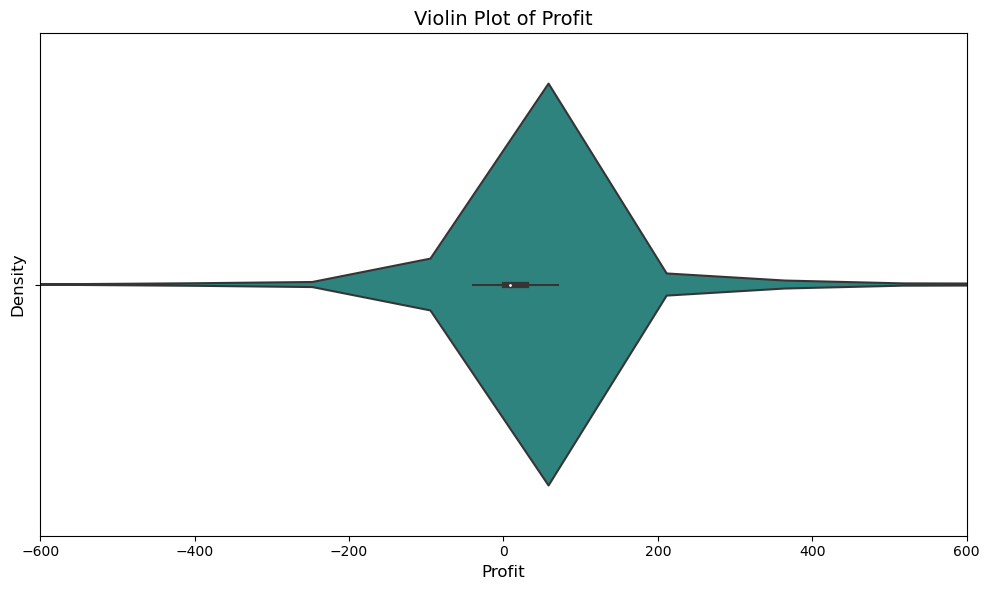

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a violin plot for the "Profit" column
sns.violinplot(x='Profit', data=df, palette='viridis')

# Set the title and labels
plt.title('Violin Plot of Profit', fontsize=14)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(-600,600)
# Show the plot
plt.tight_layout()
plt.show()


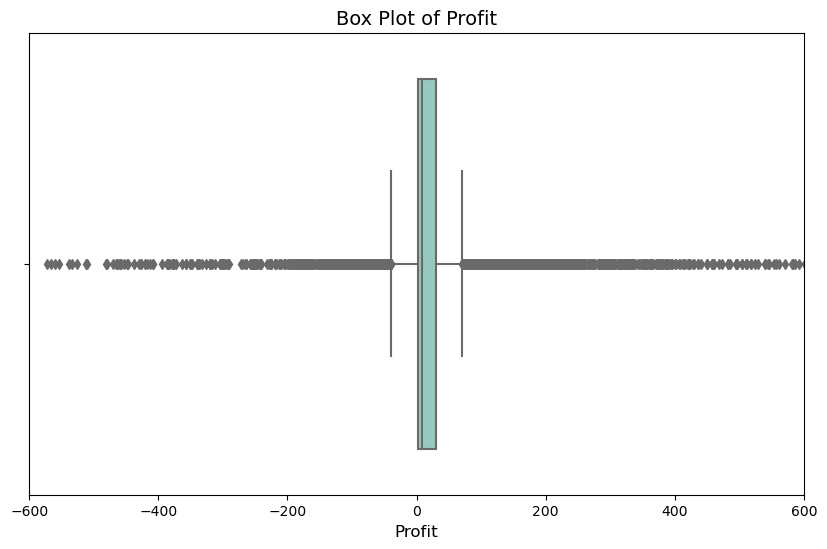

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profit', data=df, palette='Set3')
plt.title('Box Plot of Profit', fontsize=14)
plt.xlabel('Profit', fontsize=12)
plt.xlim(-600,600)
plt.show()


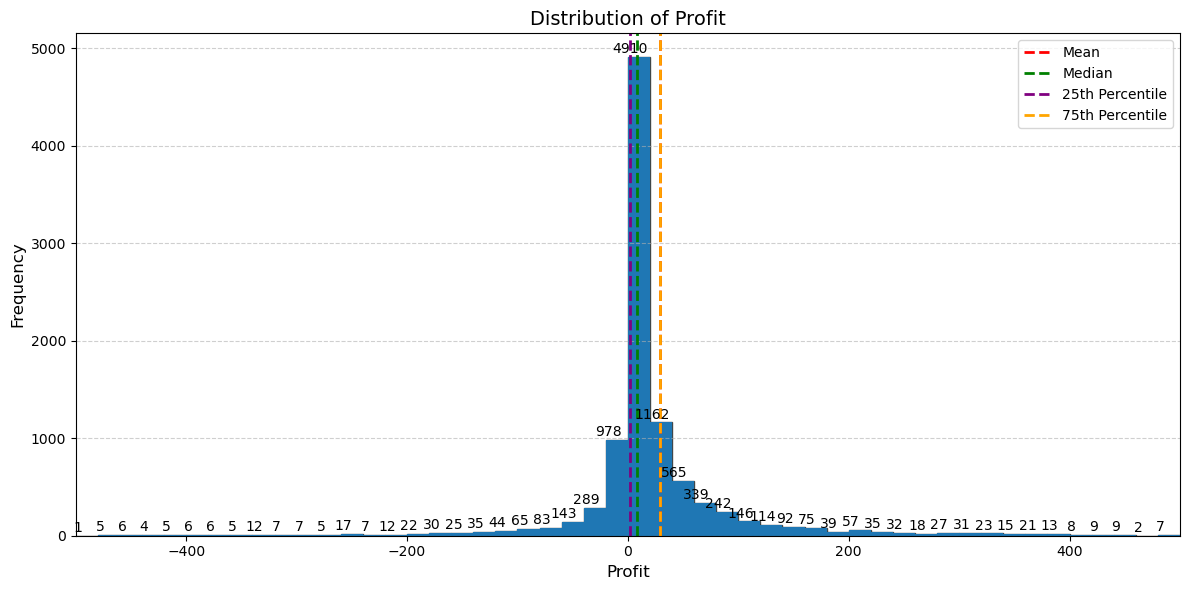

In [87]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a histogram of the "Profit" column with multiple bins
plt.figure(figsize=(12, 6))

# Set the x-axis limits (minimum and maximum values)
x_min = -500  # Adjust this to your desired minimum value
x_max = 500   # Adjust this to your desired maximum value
plt.hist(df['Profit'], bins=50, color='skyblue', edgecolor='black', alpha=0.7, range=(x_min, x_max))

plt.xlabel('Profit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Profit', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Calculate the mean and standard deviation of the "Profit" column
mean_Profit = df['Profit'].mean()
std_Profit = df['Profit'].std()

# Calculate the z-score for each data point
z_scores = (df['Profit'] - mean_Profit) / std_Profit

# Calculate the 25th, 50th (median), and 75th percentiles for z-scores
percentiles = [stats.percentileofscore(z_scores, x) for x in [-1, 0, 1]]

# Add vertical lines for mean, median, and quartiles
plt.axvline(df['Profit'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['Profit'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df['Profit'].quantile(0.25), color='purple', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df['Profit'].quantile(0.75), color='orange', linestyle='dashed', linewidth=2, label='75th Percentile')

# Add a legend
plt.legend()

# Set the x-axis limits
plt.xlim(x_min, x_max)

# Annotate the quantity above the bars
for i, count in enumerate(plt.hist(df['Profit'], bins=50, range=(x_min, x_max))[0]):
    plt.text(
        plt.hist(df['Profit'], bins=50, range=(x_min, x_max))[1][i] + 2,  # X-coordinate
        count + 10,  # Y-coordinate
        f'{int(count)}',  # Text to display (rounded to the nearest integer)
        ha='center', va='bottom', fontsize=10
    )

# Show the plot
plt.tight_layout()
plt.show()


In [88]:
# Create a function to label profit and loss categories
def label_profit_loss_Profit_Label(profit):
    if profit > 2500:
        return 'Very High Profit (> 2500)'
    elif profit > 1500:
        return 'High Profit (> 1500)'
    elif profit > 500:
        return 'Medium Profit (> 500)'
    elif profit > 0:
        return 'Low Profit (profit > 0)'
    elif profit > -100:
        return 'Medium Loss (< 100)'
    elif profit > -500:
        return 'Medium Loss (< 500)'   
    elif profit < -500:
        return 'Heavy Loss ( > 500)'
    else:
        return 'nan'

# Apply the function to create the new column 'Profit_Label'
df['Profit_Label'] = df['Profit'].apply(label_profit_loss_Profit_Label)


# Display the first few rows of the DataFrame to verify the new column
print(df[['Profit_Label']].value_counts())


Profit_Label             
Low Profit (profit > 0)      7926
Medium Loss (< 100)          1623
Medium Loss (< 500)           261
Medium Profit (> 500)          97
Heavy Loss ( > 500)            50
High Profit (> 1500)           10
Very High Profit (> 2500)      10
dtype: int64


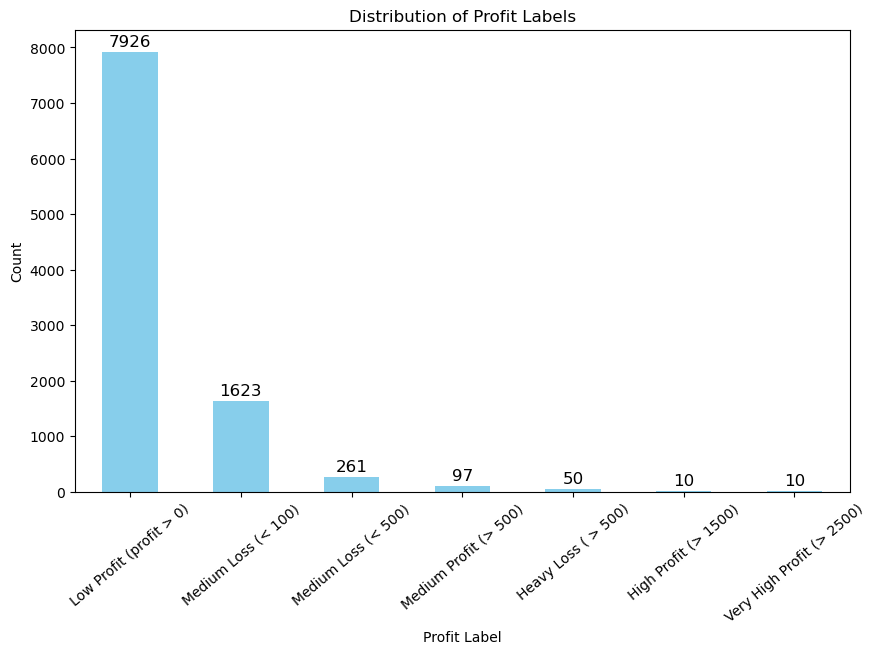

In [89]:
import matplotlib.pyplot as plt

# Calculate value counts of the 'Profit_Label' column
value_counts = df['Profit_Label'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Profit Label')
plt.ylabel('Count')
plt.title('Distribution of Profit Labels')
plt.xticks(rotation=40, fontsize=10)

# Annotate the bars with their respective counts
for i, count in enumerate(value_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


## Seperating Columns

In [90]:
obj_cols=df.select_dtypes(include='object').columns.tolist()
num_cols=df.select_dtypes(include='number').columns.tolist()
cat_cols=df.select_dtypes(include='category').columns.tolist()

# OBJECT COLUMNS

In [91]:
obj_cols

['Ship Mode',
 'Segment',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category',
 'Profit_Label']

In [92]:
for i in obj_cols:
    print(df[i].nunique() ,i)

4 Ship Mode
3 Segment
531 City
49 State
4 Region
3 Category
17 Sub-Category
7 Profit_Label


In [93]:
for i in obj_cols:
    print(i,"\n\n",df[i].value_counts())

Ship Mode 

 Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64
Segment 

 Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64
City 

 New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64
State 

 California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                

# Insight plots

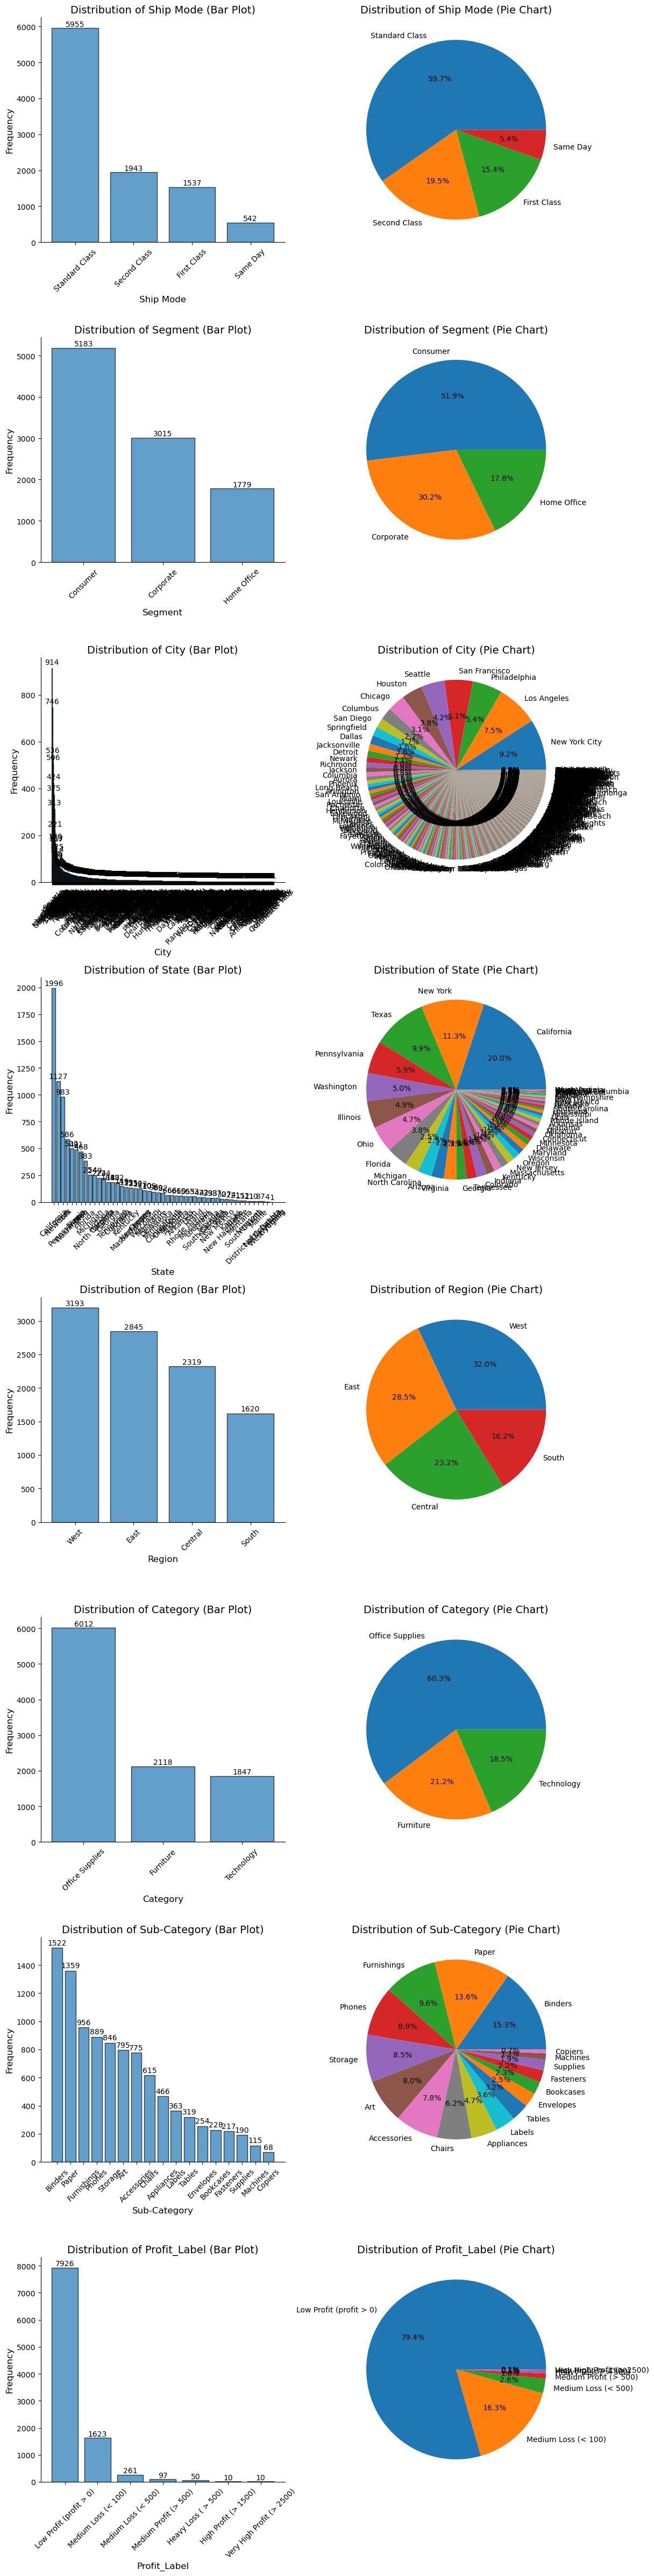

In [94]:
fig, axes = plt.subplots(len(obj_cols), 2, figsize=(12, 6*len(obj_cols)))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(obj_cols):
    # Plot the bar plot
    col_counts = df[col].value_counts()
    axes[i, 0].bar(col_counts.index, col_counts.values, edgecolor='black', alpha=0.7)
    axes[i, 0].set_xlabel(col, fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)
    axes[i, 0].set_title(f'Distribution of {col} (Bar Plot)', fontsize=14)
    axes[i, 0].tick_params(axis='x', rotation=45, labelsize=10)
    for j, v in enumerate(col_counts.values):
        axes[i, 0].text(j, v + 10, str(v), ha='center', va='bottom', fontsize=10)
    axes[i, 0].spines['top'].set_visible(False)
    axes[i, 0].spines['right'].set_visible(False)

    # Plot the pie chart
    col_counts.plot(kind="pie", autopct='%1.1f%%', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {col} (Pie Chart)', fontsize=14)
    axes[i, 1].set_ylabel("")  # Remove the default ylabel

# Show the plots
plt.tight_layout()
plt.show()

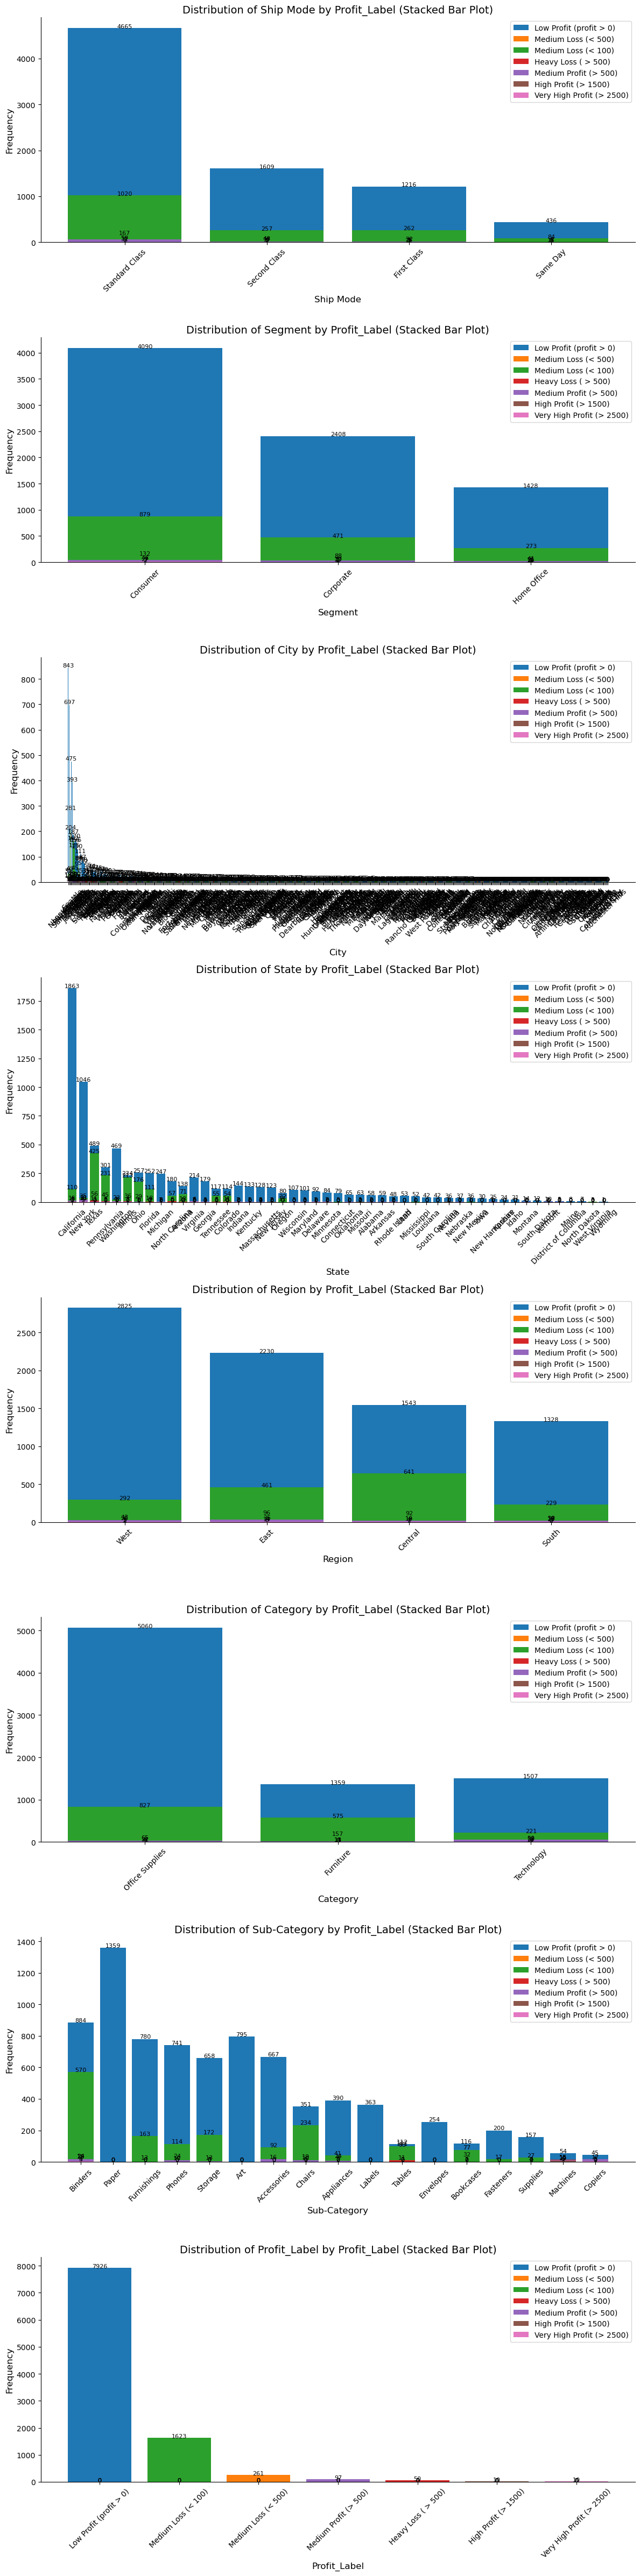

In [109]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axes = plt.subplots(len(obj_cols), 1, figsize=(12, 6*len(obj_cols)))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(obj_cols):
    # Calculate counts for each category in the column for both "Profit_Label"
    col_counts = df[col].value_counts()
    profit_labels = df['Profit_Label'].unique()

    # Initialize a dictionary to store counts for each "Profit_Label"
    counts_by_profit_label = {label: [] for label in profit_labels}

    for label in profit_labels:
        # Get the counts for the current "Profit_Label"
        label_counts = df[df['Profit_Label'] == label][col].value_counts()
        categories = col_counts.index

        for category in categories:
            # Get the count for the current category and "Profit_Label"
            count = label_counts.get(category, 0)

            # Append the count to the respective list
            counts_by_profit_label[label].append(count)

    # Create a stacked bar plot for each "Profit_Label"
    for label in profit_labels:
        axes[i].bar(categories, counts_by_profit_label[label], label=label)

        # Annotate each bar with the count value
        for j, count in enumerate(counts_by_profit_label[label]):
            axes[i].annotate(count, (j, counts_by_profit_label[label][j] + 5), ha='center', fontsize=8)

    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_title(f'Distribution of {col} by Profit_Label (Stacked Bar Plot)', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].legend()

# Show the plots
plt.tight_layout()
plt.show()


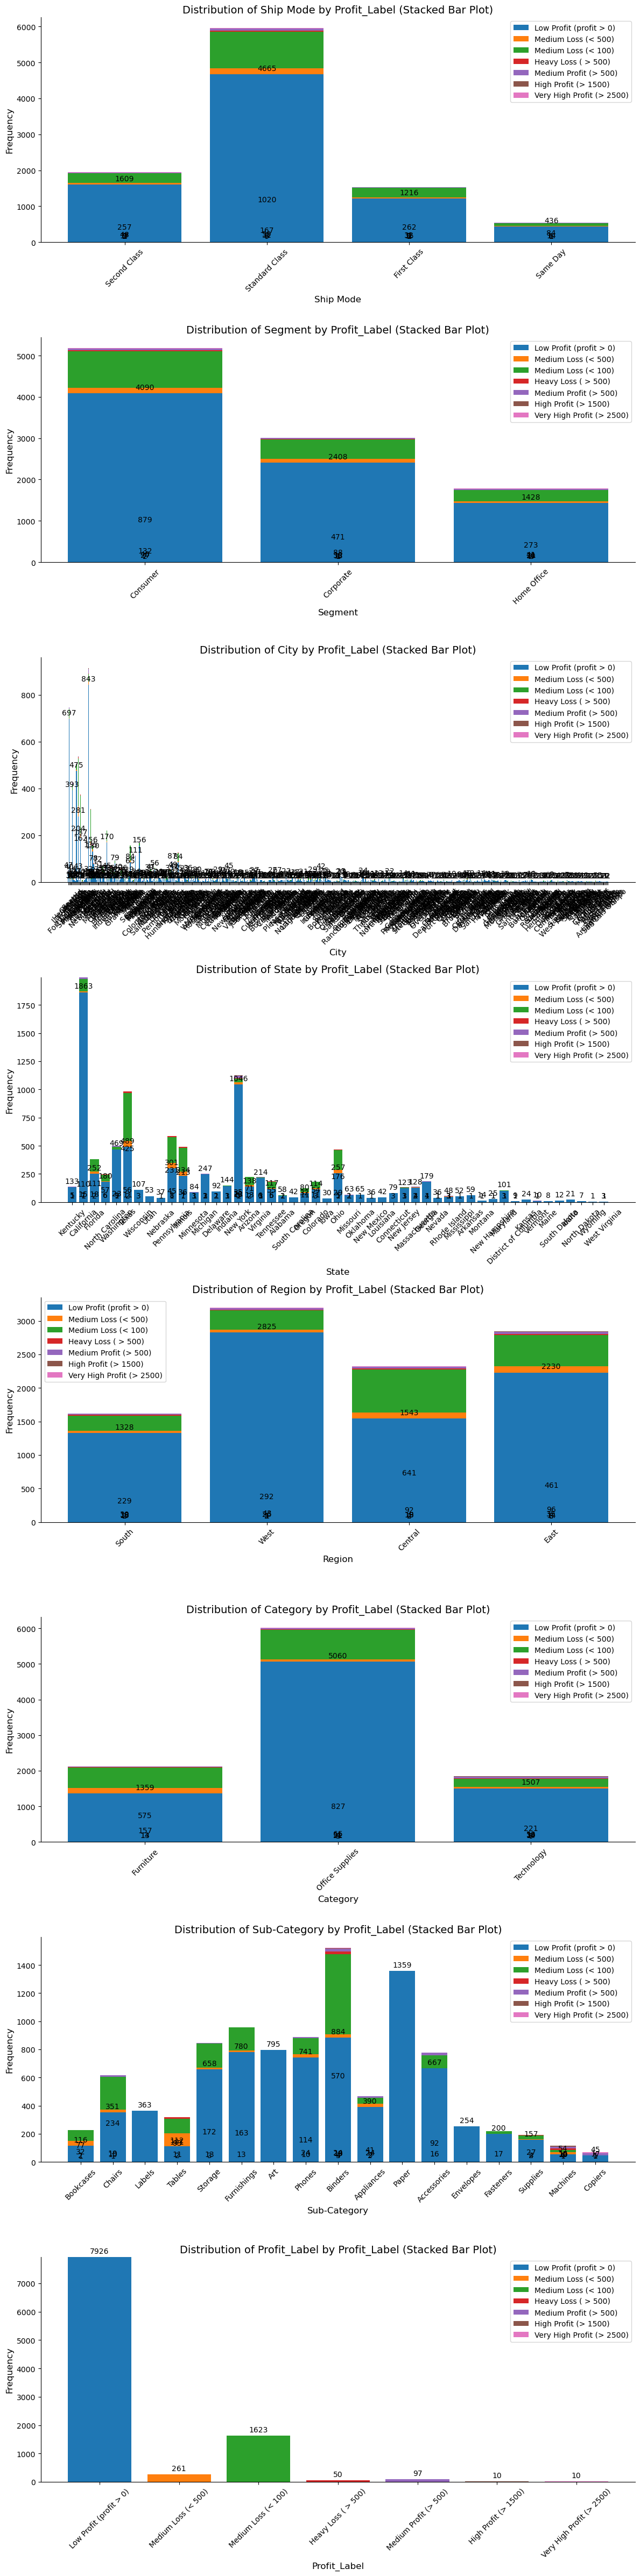

In [108]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axes = plt.subplots(len(obj_cols), 1, figsize=(12, 6*len(obj_cols)))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(obj_cols):
    # Get unique categories in the column
    categories = df[col].unique()
    
    # Initialize a dictionary to store counts for each category by "Profit_Label"
    counts_by_profit_label = {label: [] for label in df['Profit_Label'].unique()}
    
    for label in df['Profit_Label'].unique():
        # Get the counts for each category by "Profit_Label"
        category_counts = df[df['Profit_Label'] == label][col].value_counts()
        
        # Append the counts to the respective list
        counts_by_profit_label[label] = [category_counts.get(cat, 0) for cat in categories]
    
    # Create a stacked bar plot
    bottom = [0] * len(categories)
    
    for label in df['Profit_Label'].unique():
        bars = axes[i].bar(categories, counts_by_profit_label[label], label=label, bottom=bottom)
        
        for bar, count in zip(bars, counts_by_profit_label[label]):
            if count > 0:
                axes[i].annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

        bottom = [prev + curr for prev, curr in zip(bottom, counts_by_profit_label[label])]
    
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_title(f'Distribution of {col} by Profit_Label (Stacked Bar Plot)', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].legend()

# Show the plots
plt.tight_layout()
plt.show()


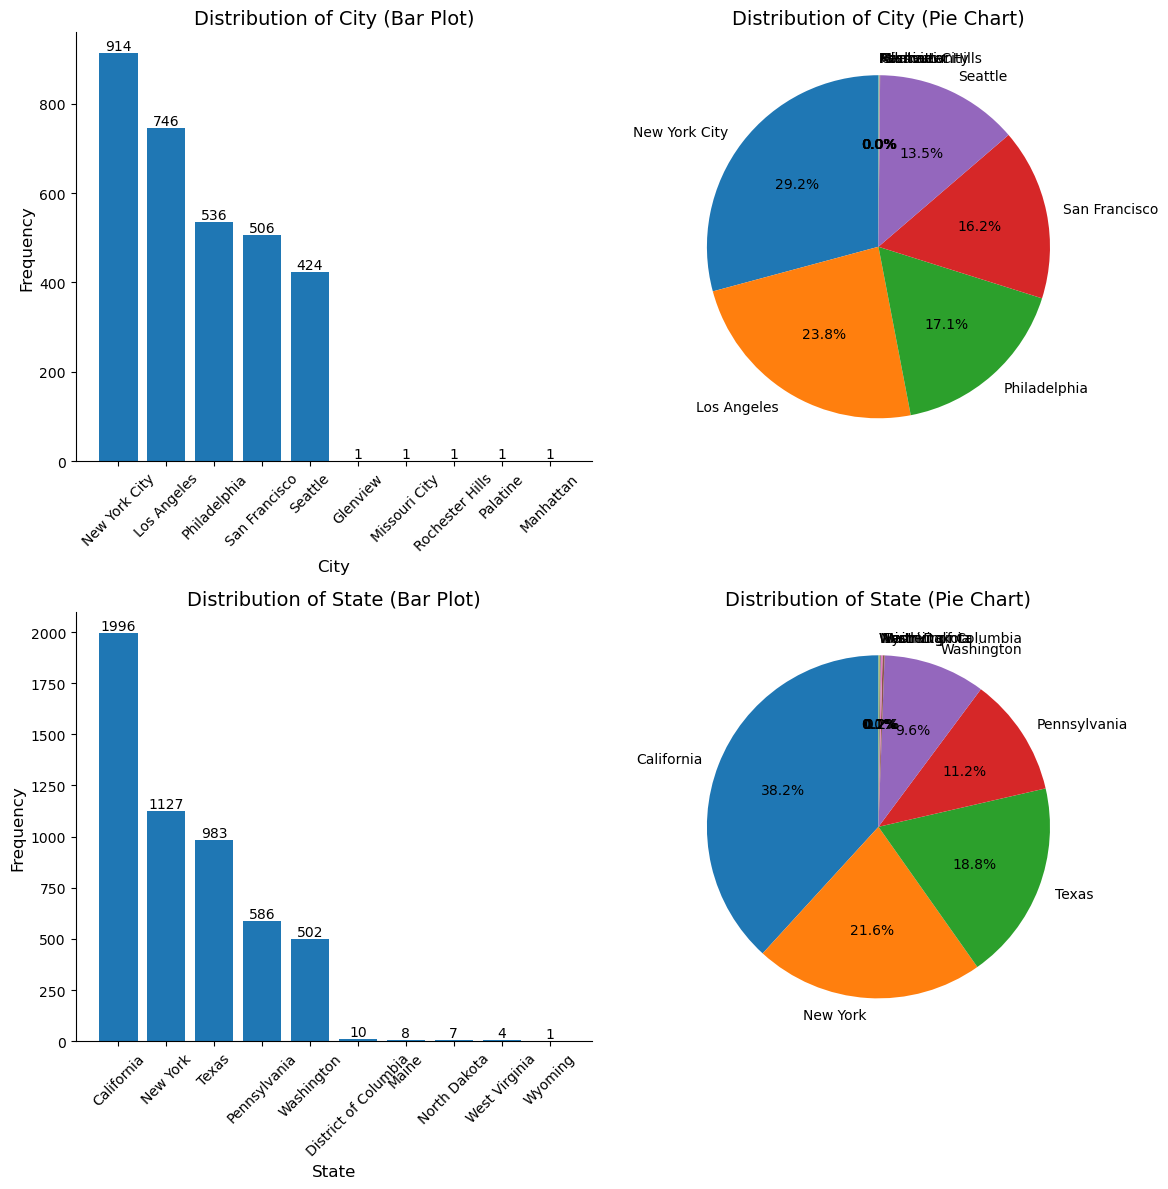

In [97]:
import matplotlib.pyplot as plt

# Define the columns of interest
columns_of_interest = ['City', 'State']

# Create subplots for the columns of interest
fig, axes = plt.subplots(len(columns_of_interest), 2, figsize=(12, 6*len(columns_of_interest)))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_of_interest):
    # Calculate counts for each category in the column for both "Profit_Label"
    col_counts = df[col].value_counts()
    
    # Get the top 5 and bottom 5 categories
    top5 = col_counts.head(5)
    bottom5 = col_counts.tail(5)
    
    # Combine the top 5 and bottom 5 categories
    categories = top5.index.tolist() + bottom5.index.tolist()
    
    # Get the counts for the combined categories
    combined_counts = [col_counts.get(category, 0) for category in categories]
    
    # Create a bar plot
    axes[i, 0].bar(categories, combined_counts)
    axes[i, 0].set_xlabel(col, fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)
    axes[i, 0].set_title(f'Distribution of {col} (Bar Plot)', fontsize=14)
    axes[i, 0].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i, 0].spines['top'].set_visible(False)
    axes[i, 0].spines['right'].set_visible(False)
    
    # Add annotations to the bar plot
    for j, count in enumerate(combined_counts):
        axes[i, 0].annotate(str(count), (categories[j], count), ha='center', va='bottom', fontsize=10)
    
    # Create a pie chart
    axes[i, 1].pie(combined_counts, labels=categories, autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Distribution of {col} (Pie Chart)', fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


<Axes: >

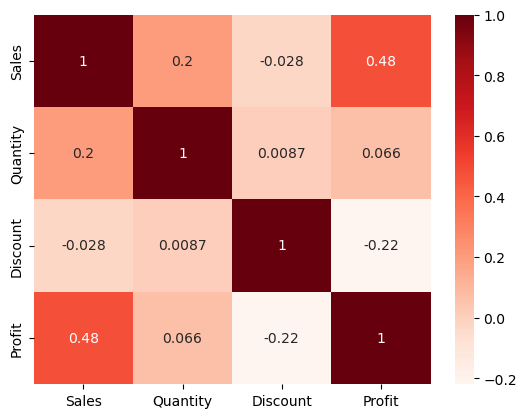

In [98]:
sns.heatmap(df[['Sales','Quantity',"Discount","Profit"]].corr(),annot=True,cmap="Reds")

# SUM

#pattern <br>

positive<br>
sales      quantity    Profit<br>
quantity    Sales<br>
Profit      Sales    <br>   

negative<br>
disc   Sales



In [99]:
df.groupby(by=['Segment']).sum(numeric_only=True).sort_values("Profit") #insight

Postal Code         Sales  Quantity  Discount       Profit
Segment                                                                
Home Office     97903137  4.292927e+05      6732    261.83   60279.0015
Corporate      164108306  7.060701e+05     11591    476.85   91954.9798
Consumer       288269634  1.160833e+06     19497    820.51  134007.4413

In [100]:
df.groupby(by=['Ship Mode']).sum(numeric_only=True)

Postal Code         Sales  Quantity  Discount       Profit
Ship Mode                                                                 
First Class        84152470  3.513805e+05      5690    252.97   48953.6561
Same Day           31147971  1.283217e+05      1956     82.75   15871.8869
Second Class      108033820  4.591770e+05      7418    269.35   57446.6516
Standard Class    326946816  1.357316e+06     22756    954.12  163969.2280

## Numeric Columns

In [101]:
df[num_cols].describe()

Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600

In [102]:
df['Sales'].nunique()

5825

In [103]:
df[num_cols].sort_values("Sales")

Postal Code      Sales  Quantity  Discount     Profit
4101        77095      0.444         1       0.8    -1.1100
9292        76706      0.556         1       0.8    -0.9452
8658        60623      0.836         1       0.8    -1.3376
4711        19120      0.852         1       0.7    -0.5964
2106        75150      0.876         1       0.8    -1.4016
...           ...        ...       ...       ...        ...
4190        19711  10499.970         3       0.0  5039.9856
2623        10024  11199.968         4       0.2  3919.9888
8153        98115  13999.960         4       0.0  6719.9808
6826        47905  17499.950         5       0.0  8399.9760
2697        32216  22638.480         6       0.5 -1811.0784

[9977 rows x 5 columns]

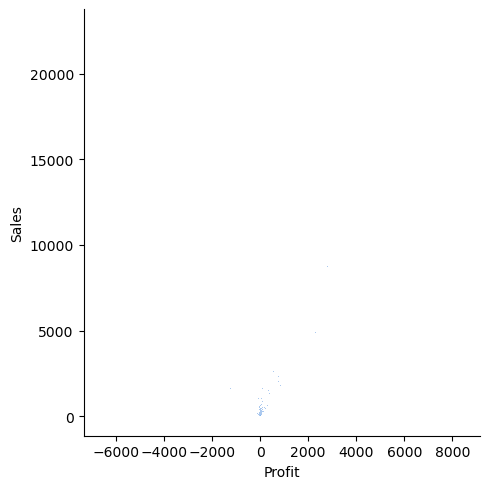

In [104]:
sns.displot(x=df['Profit'],y=df['Sales'])

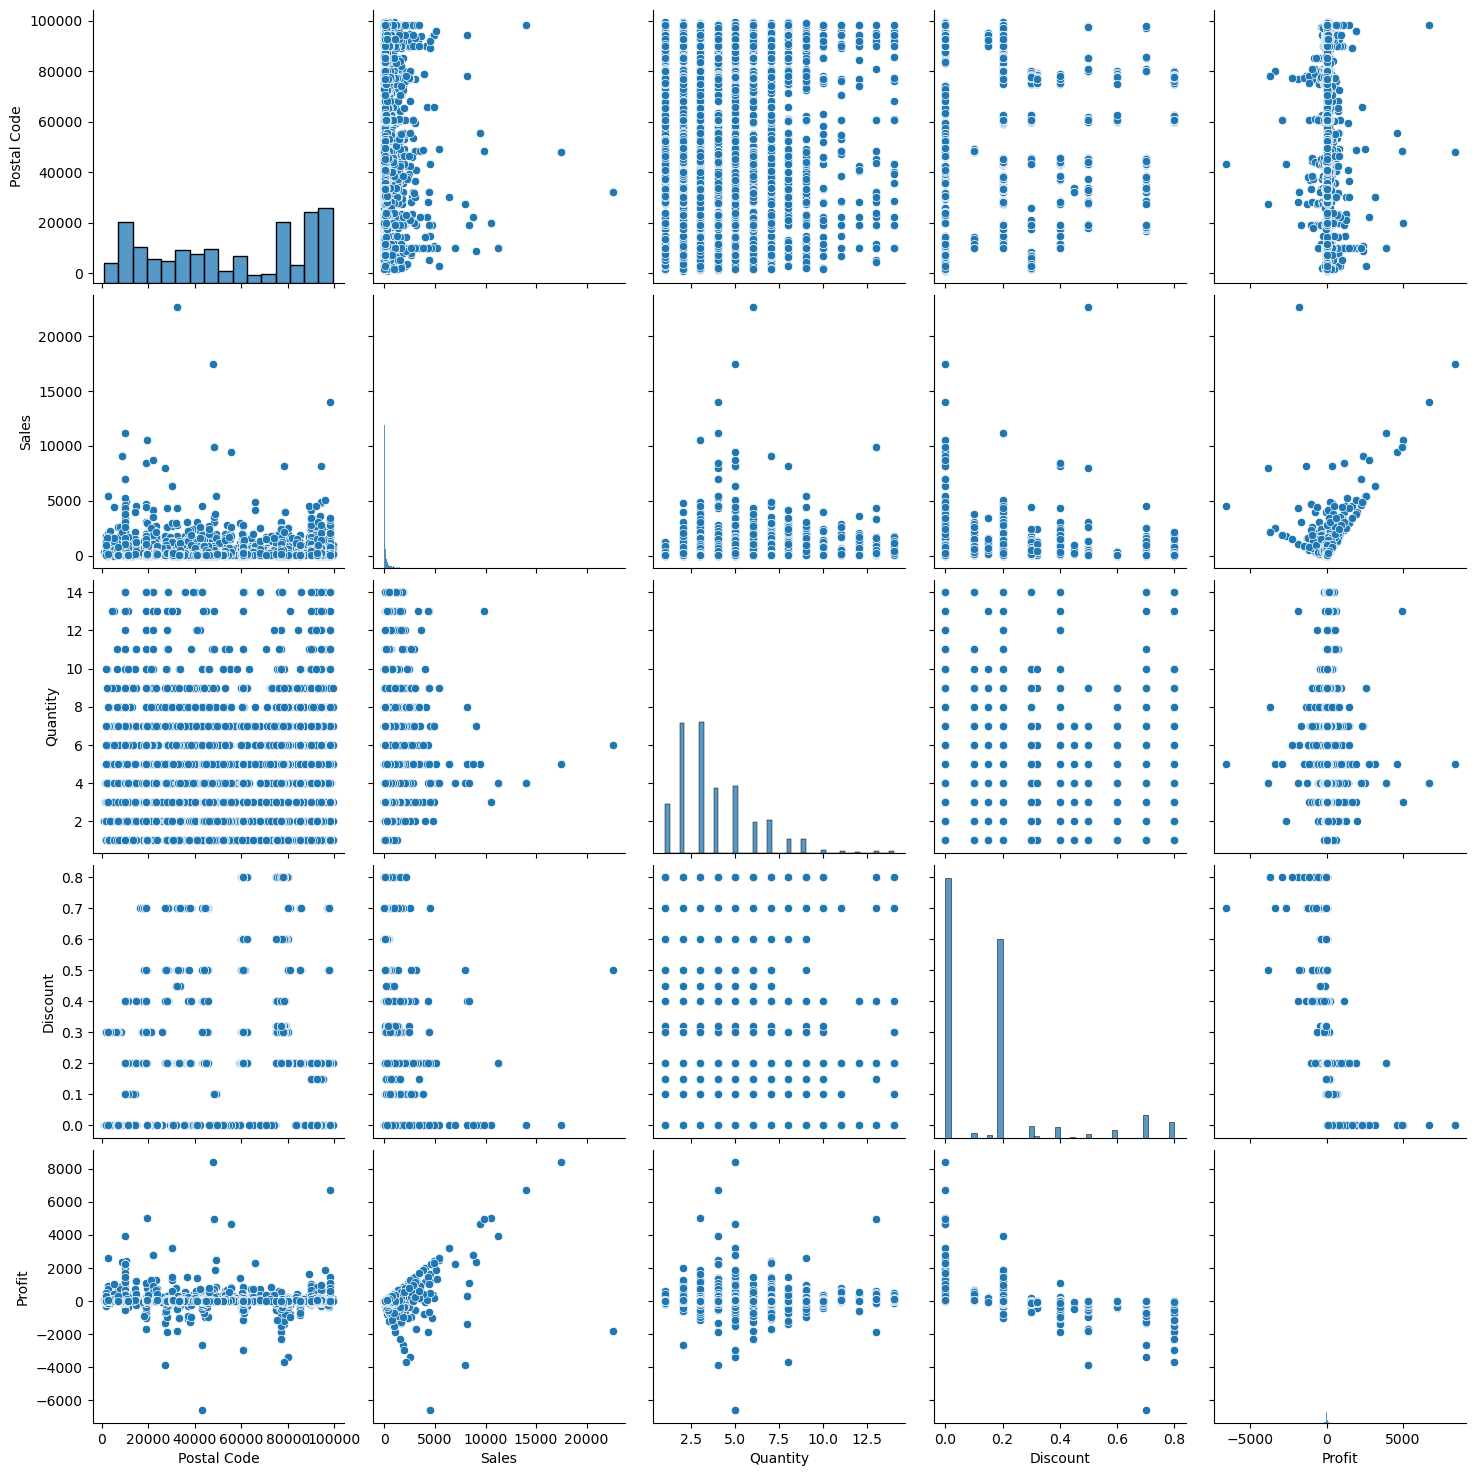

In [105]:
sns.pairplot(df[num_cols],height=3)

In [106]:
df.groupby(by=['']).agg([sum,max,describe,min,count,...])


KeyError: ''

In [ ]:
def print_alpha_nums(abc_list, num_list):
    for char in abc_list:
        for num in num_list:
            print(char, num)
    return

print_alpha_nums(['a', 'b', 'c'], [1, 2, 3])

a 1
a 2
a 3
b 1
b 2
b 3
c 1
c 2
c 3


In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'

# Total Sales and Profit
total_Sales = df['Sales'].sum()
total_Profit = df['Profit'].sum()

# Average Sales and Profit
average_Sales = df['Sales'].mean()
average_Profit = df['Profit'].mean()

# Sales by Category
Sales_by_Profit_Label = df.groupby('Profit_Label')['Sales'].sum()

# Sales by SubProfit_Label
Sales_by_subProfit_Label = df.groupby('sub Profit_Label')['Sales'].sum()

# Total Quantity Sold
total_quantity_sold = df['quantity'].sum()

# Average Quantity Sold
average_quantity_sold = df['quantity'].mean()

# Total Discount Given
total_discount_given = df['discount'].sum()

# Average Discount
average_discount = df['discount'].mean()

# Sales by Region
Sales_by_region = df.groupby('region')['Sales'].sum()

# Profit by City
Profit_by_city = df.groupby('city')['Profit'].sum()

# Customer Segmentation
customer_segmentation = df.groupby(['segment', 'country'])['Sales'].sum()

# Shipping Mode Insights
shipping_mode_counts = df['ship mode'].value_counts()

# You can print or further analyze these variables as needed.


KeyError: 'sub Profit_Label'

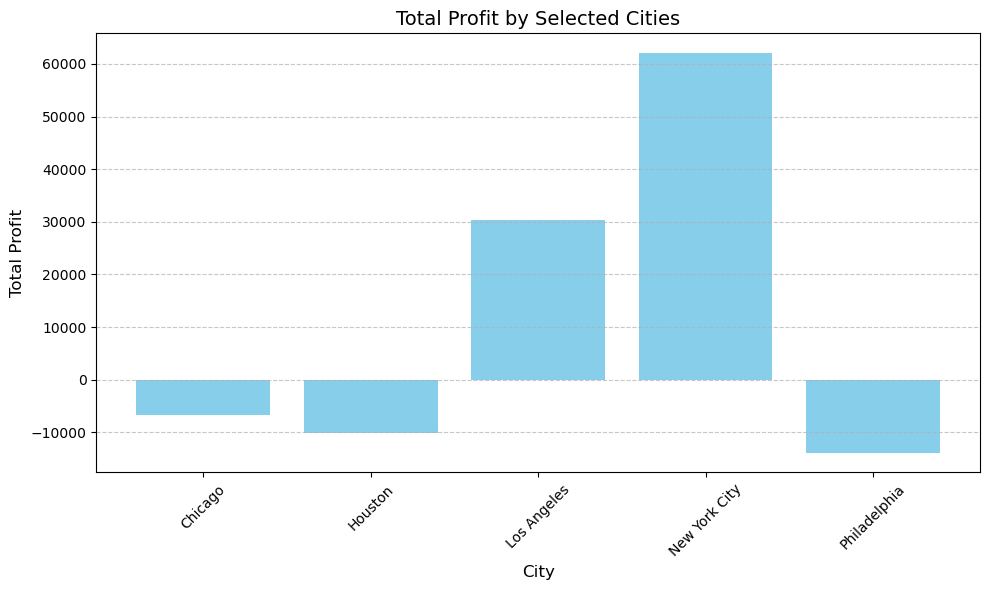

In [ ]:
import matplotlib.pyplot as plt

# Define the selected cities you want to plot
selected_cities = ['New York City', 'Los Angeles', 'Chicago', 'Houston', 'Philadelphia']

# Filter the DataFrame to include only the selected cities
filtered_df = df[df['City'].isin(selected_cities)]

# Calculate the total profit for each selected city
city_profits = filtered_df.groupby('City')['Profit'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(city_profits.index, city_profits.values, color='skyblue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.title('Total Profit by Selected Cities', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


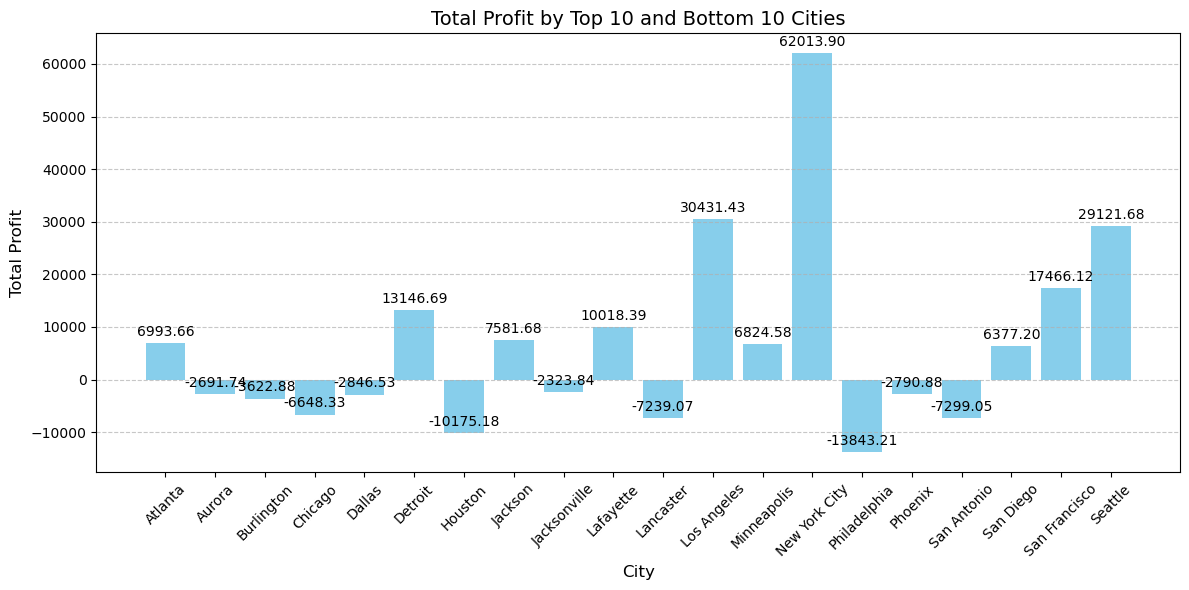

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total profit for each city
city_profits = df.groupby('City')['Profit'].sum()

# Sort the cities by profit in descending order
sorted_cities = city_profits.sort_values(ascending=False)

# Select the top 10 and bottom 10 cities
top_10_cities = sorted_cities.head(10)
bottom_10_cities = sorted_cities.tail(10)

# Combine the top 10 and bottom 10 cities
selected_cities = top_10_cities.index.tolist() + bottom_10_cities.index.tolist()

# Filter the DataFrame to include only the selected cities
filtered_df = df[df['City'].isin(selected_cities)]

# Calculate the total profit for each selected city
city_profits = filtered_df.groupby('City')['Profit'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(city_profits.index, city_profits.values, color='skyblue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.title('Total Profit by Top 10 and Bottom 10 Cities', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate the bars with profit values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


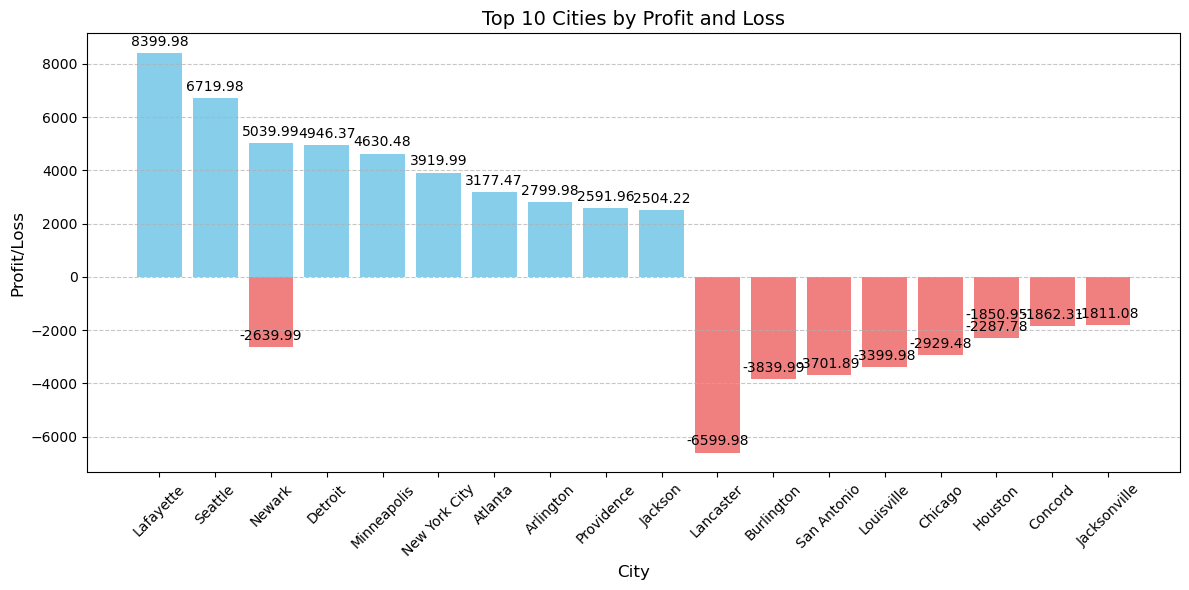

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only cities with profit
profit_cities = df[df['Profit'] > 0]

# Filter the DataFrame to include only cities with loss
loss_cities = df[df['Profit'] < 0]

# Sort the profit cities by profit in descending order and select the top 10
top_10_profit_cities = profit_cities.sort_values(by='Profit', ascending=False).head(10)

# Sort the loss cities by profit in ascending order and select the top 10
top_10_loss_cities = loss_cities.sort_values(by='Profit', ascending=True).head(10)

# Concatenate the top 10 profit and top 10 loss cities
top_10_cities_combined = pd.concat([top_10_profit_cities, top_10_loss_cities])

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_cities_combined['City'], top_10_cities_combined['Profit'], color=['skyblue' if profit > 0 else 'lightcoral' for profit in top_10_cities_combined['Profit']])
plt.xlabel('City', fontsize=12)
plt.ylabel('Profit/Loss', fontsize=12)
plt.title('Top 10 Cities by Profit and Loss', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate the bars with profit/loss values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


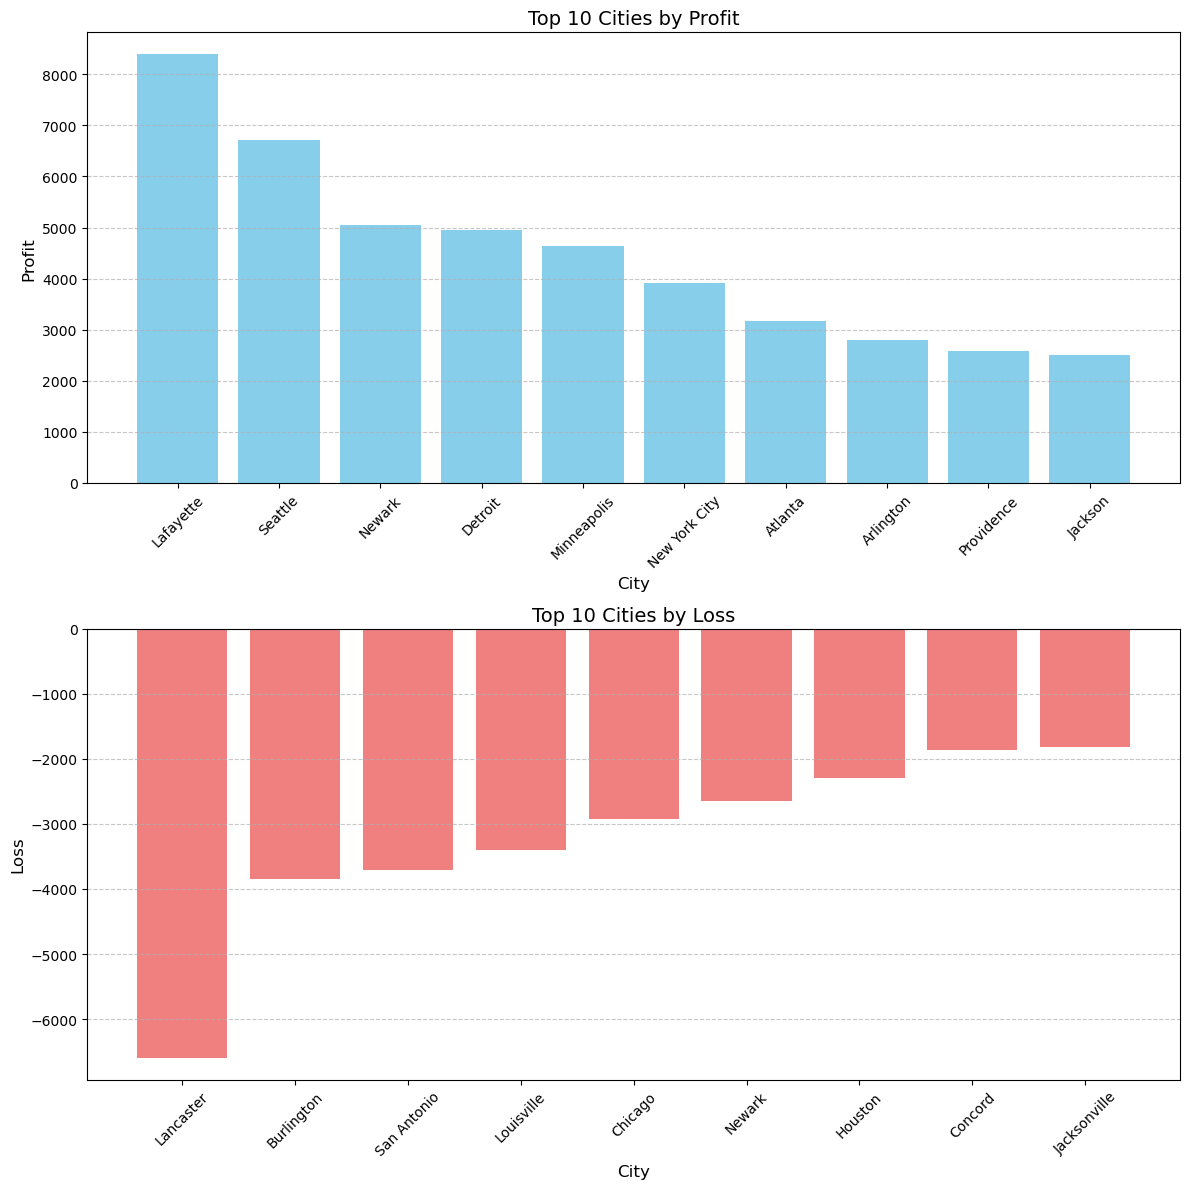

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only cities with profit
profit_cities = df[df['Profit'] > 0]

# Filter the DataFrame to include only cities with loss
loss_cities = df[df['Profit'] < 0]

# Sort the profit cities by profit in descending order and select the top 10
top_10_profit_cities = profit_cities.sort_values(by='Profit', ascending=False).head(10)

# Sort the loss cities by profit in ascending order and select the top 10
top_10_loss_cities = loss_cities.sort_values(by='Profit', ascending=True).head(10)

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the top 10 cities with profit
ax1.bar(top_10_profit_cities['City'], top_10_profit_cities['Profit'], color='skyblue')
ax1.set_xlabel('City', fontsize=12)
ax1.set_ylabel('Profit', fontsize=12)
ax1.set_title('Top 10 Cities by Profit', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot the top 10 cities with loss
ax2.bar(top_10_loss_cities['City'], top_10_loss_cities['Profit'], color='lightcoral')
ax2.set_xlabel('City', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Top 10 Cities by Loss', fontsize=14)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


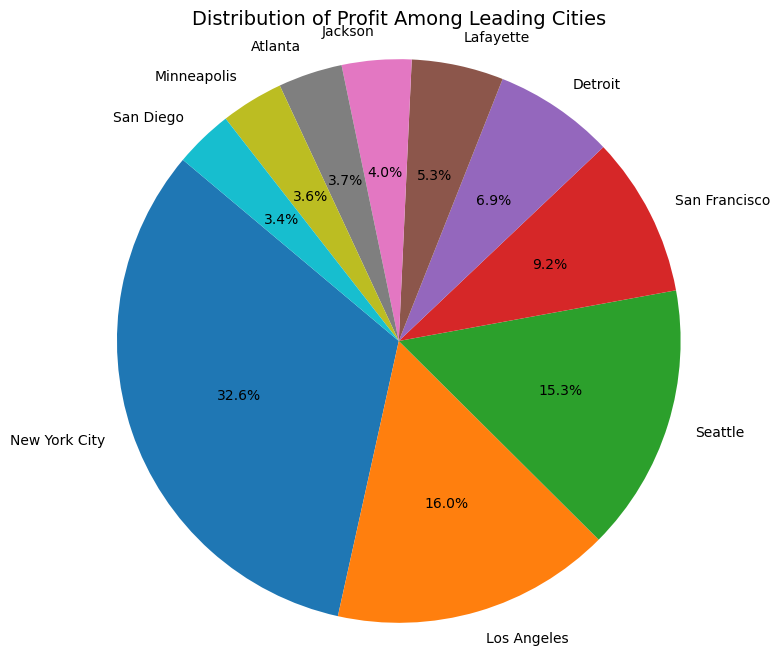

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total profit for each city
city_profits = df.groupby('City')['Profit'].sum()

# Sort the cities by profit in descending order and select the top 10
top_10_cities = city_profits.sort_values(ascending=False).head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_cities.values, labels=top_10_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Profit Among Leading Cities', fontsize=14)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
df[df['City']=='Lafayette']

Ship Mode      Segment       City      State  Postal Code   Region  \
1627  Standard Class     Consumer  Lafayette  Louisiana        70506    South   
1932    Second Class     Consumer  Lafayette  Louisiana        70506    South   
1933    Second Class     Consumer  Lafayette  Louisiana        70506    South   
2332  Standard Class     Consumer  Lafayette    Indiana        47905  Central   
2333  Standard Class     Consumer  Lafayette    Indiana        47905  Central   
2573  Standard Class  Home Office  Lafayette    Indiana        47905  Central   
3530  Standard Class    Corporate  Lafayette    Indiana        47905  Central   
3588     First Class     Consumer  Lafayette  Louisiana        70506    South   
4029  Standard Class     Consumer  Lafayette  Louisiana        70506    South   
4030  Standard Class     Consumer  Lafayette  Louisiana        70506    South   
4361    Second Class     Consumer  Lafayette  Louisiana        70506    South   
4943  Standard Class     Consumer  Lafayette    Indiana        47905  Central   
5120  Standard Class    Corporate  Lafayette  Louisiana        70506    South   
5121  Standard Class    Corporate  Lafayette  Louisiana        70506    South   
5122  Standard Class    Corporate  Lafayette  Louisiana        70506    South   
5123  Standard Class    Corporate  Lafayette  Louisiana        70506    South   
5719    Second Class     Consumer  Lafayette    Indiana        47905  Central   
6401     First Class     Consumer  Lafayette  Louisiana        70506    South   
6402     First Class     Consumer  Lafayette  Louisiana        70506    South   
6403     First Class     Consumer  Lafayette  Louisiana        70506    South   
6825  Standard Class    Corporate  Lafayette    Indiana        47905  Central   
6826  Standard Class    Corporate  Lafayette    Indiana        47905  Central   
6827  Standard Class    Corporate  Lafayette    Indiana        47905  Central   
6828  Standard Class    Corporate  Lafayette    Indiana        47905  Central   
6829  Standard Class    Corporate  Lafayette    Indiana        47905  Central   
8740     First Class     Consumer  Lafayette  Louisiana        70506    South   
9220     First Class     Consumer  Lafayette  Louisiana        70506    South   
9221     First Class     Consumer  Lafayette  Louisiana        70506    South   
9222     First Class     Consumer  Lafayette  Louisiana        70506    South   
9886  Standard Class     Consumer  Lafayette    Indiana        47905  Central   
9980    Second Class     Consumer  Lafayette  Louisiana        70506    South   

             Category Sub-Category     Sales  Quantity  Discount     Profit  \
1627        Furniture       Chairs    517.50         6       0.0   155.2500   
1932        Furniture    Bookcases    145.74         3       0.0    23.3184   
1933        Furniture  Furnishings     15.40         5       0.0     7.3920   
2332  Office Supplies        Paper    277.40         5       0.0   133.1520   
2333  Office Supplies        Paper      5.78         1       0.0     2.8322   
2573        Furniture  Furnishings    526.45         5       0.0    31.5870   
3530  Office Supplies          Art     21.40         5       0.0     6.2060   
3588  Office Supplies     Supplies   1665.62         2       0.0    33.3124   
4029       Technology     Machines    479.97         3       0.0   239.9850   
4030        Furniture       Chairs    232.88         4       0.0    60.5488   
4361       Technology       Phones     29.16         3       0.0     8.4564   
4943  Office Supplies      Storage    375.34         1       0.0    18.7670   
5120  Office Supplies      Storage    232.55         5       0.0     9.3020   
5121       Technology  Accessories     99.98         2       0.0    42.9914   
5122  Office Supplies        Paper     19.44         3       0.0     9.3312   
5123  Office Supplies        Paper     12.96         2       0.0     6.3504   
5719  Office Supplies      Storage     81.40         5       0.0    21.1640

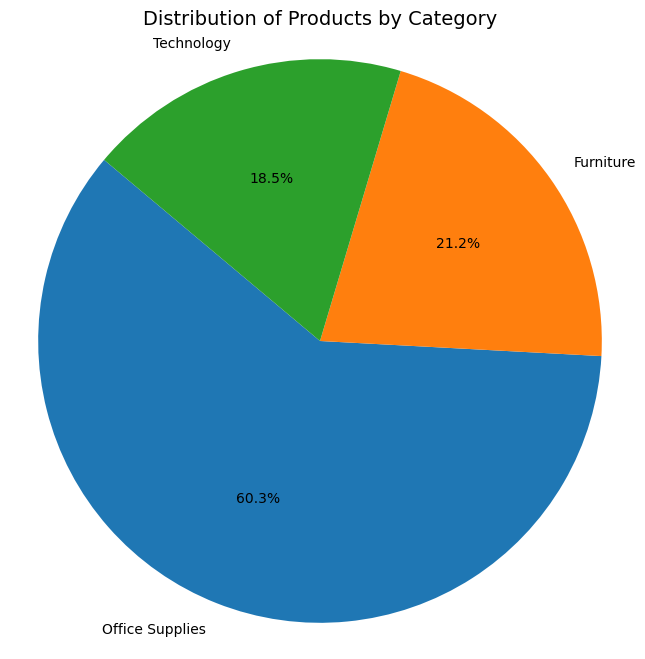

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of products in each category
category_counts = df['Category'].value_counts()

# Create a pie chart for product distribution by category
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Category', fontsize=14)

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



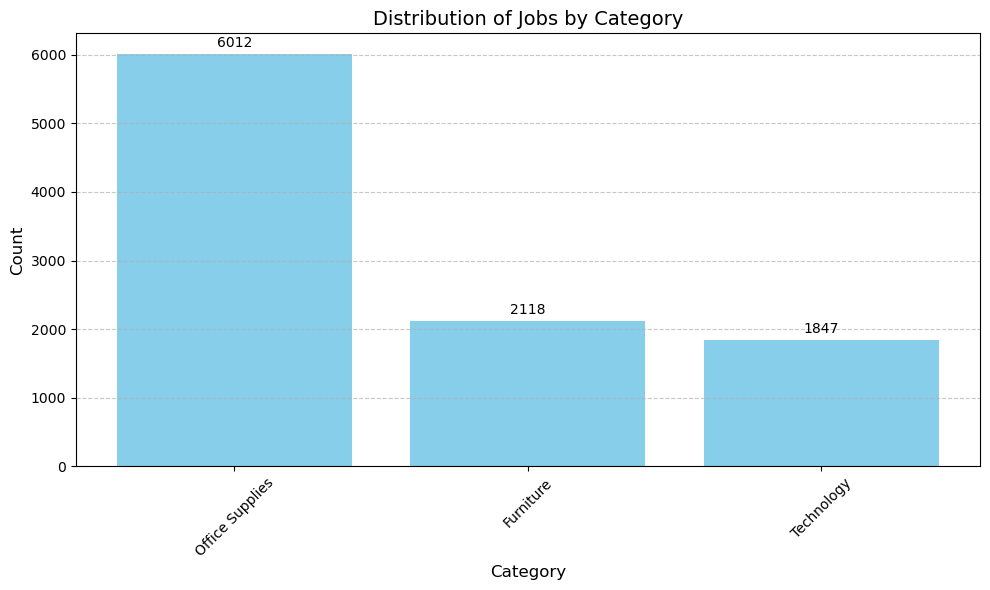

In [ ]:
# Calculate the count of jobs in each category
job_counts = df['Category'].value_counts()

# Create a bar chart for the distribution of jobs by category
plt.figure(figsize=(10, 6))
bars = plt.bar(job_counts.index, job_counts.values, color='skyblue')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Jobs by Category', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with count values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.tight_layout()
plt.show()


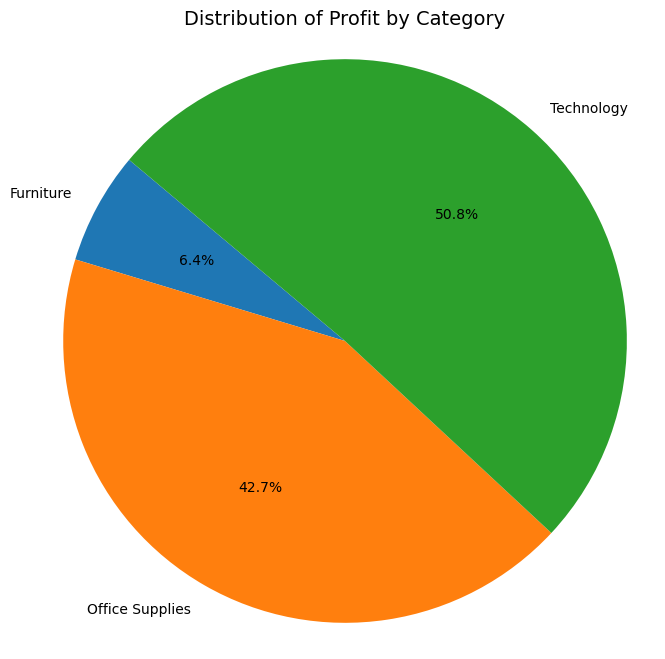

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total profit for each category
category_profits = df.groupby('Category')['Profit'].sum()

# Create a pie chart for profit distribution by category
plt.figure(figsize=(8, 8))
plt.pie(category_profits, labels=category_profits.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Profit by Category', fontsize=14)

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


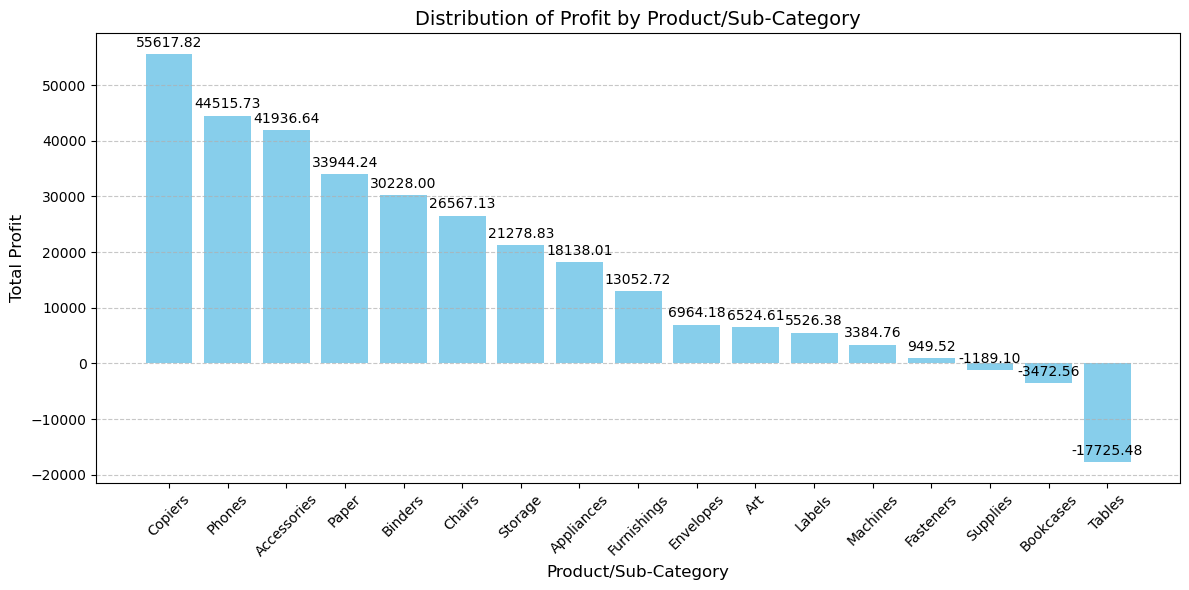

In [ ]:
# Calculate the total profit for each product or sub-category
product_profits = df.groupby('Sub-Category')['Profit'].sum()

# Sort the products by profit in descending order
sorted_products = product_profits.sort_values(ascending=False)

# Create a bar chart for the distribution of profit by product or sub-category
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_products.index, sorted_products.values, color='skyblue')
plt.xlabel('Product/Sub-Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.title('Distribution of Profit by Product/Sub-Category', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with profit values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.tight_layout()
plt.show()


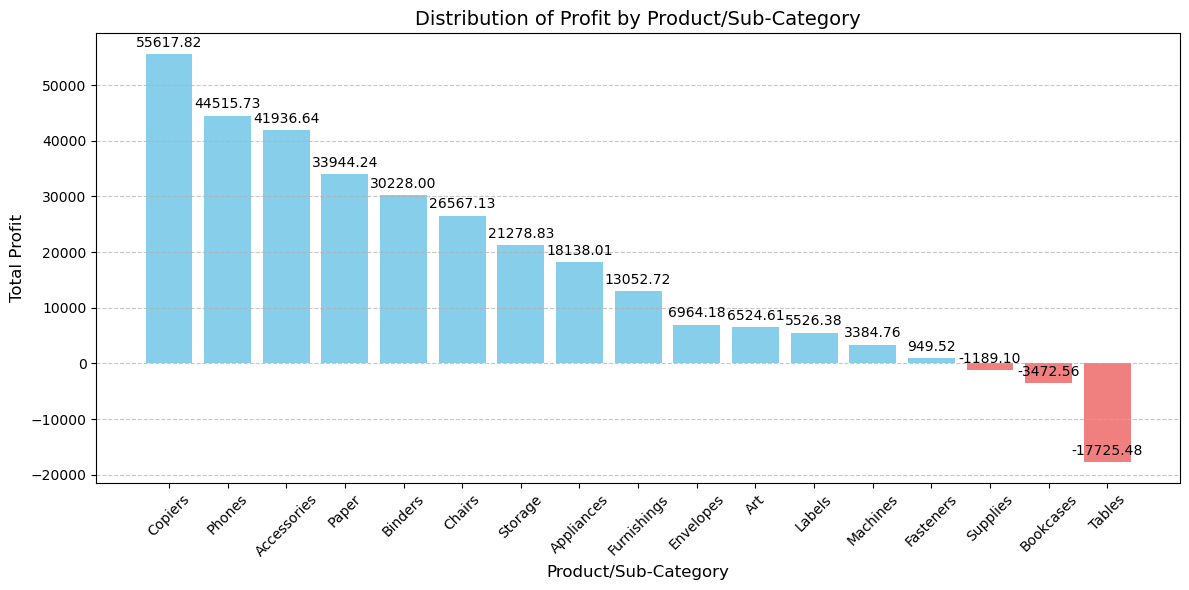

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total profit for each product or sub-category
product_profits = df.groupby('Sub-Category')['Profit'].sum()

# Sort the products by profit in descending order
sorted_products = product_profits.sort_values(ascending=False)

# Define a list of colors for the bars
bar_colors = ['skyblue' if profit > 0 else 'lightcoral' for profit in sorted_products.values]

# Create a bar chart for the distribution of profit by product or sub-category
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_products.index, sorted_products.values, color=bar_colors)
plt.xlabel('Product/Sub-Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.title('Distribution of Profit by Product/Sub-Category', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with profit values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.tight_layout()
plt.show()


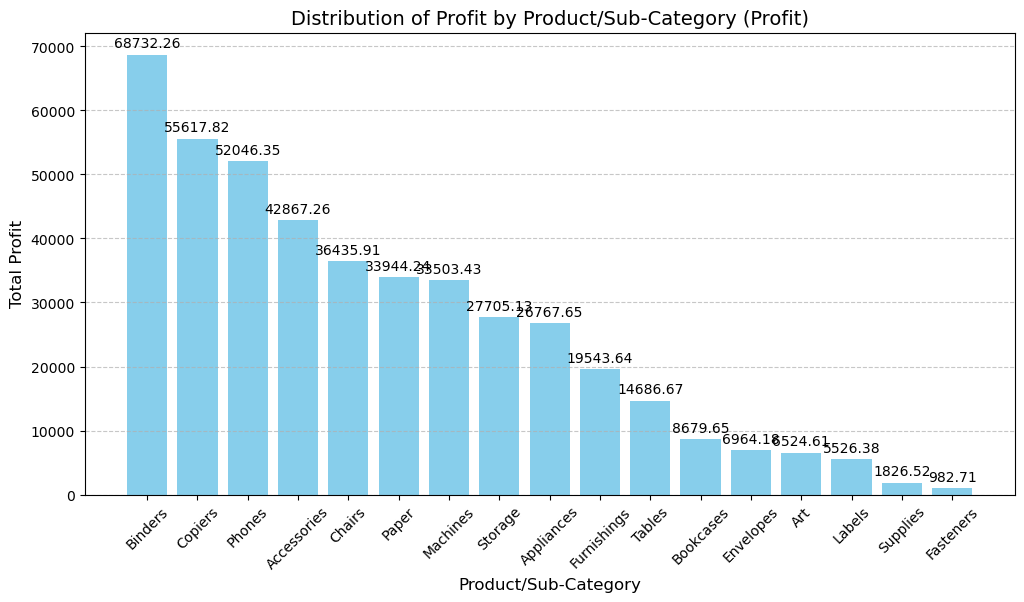

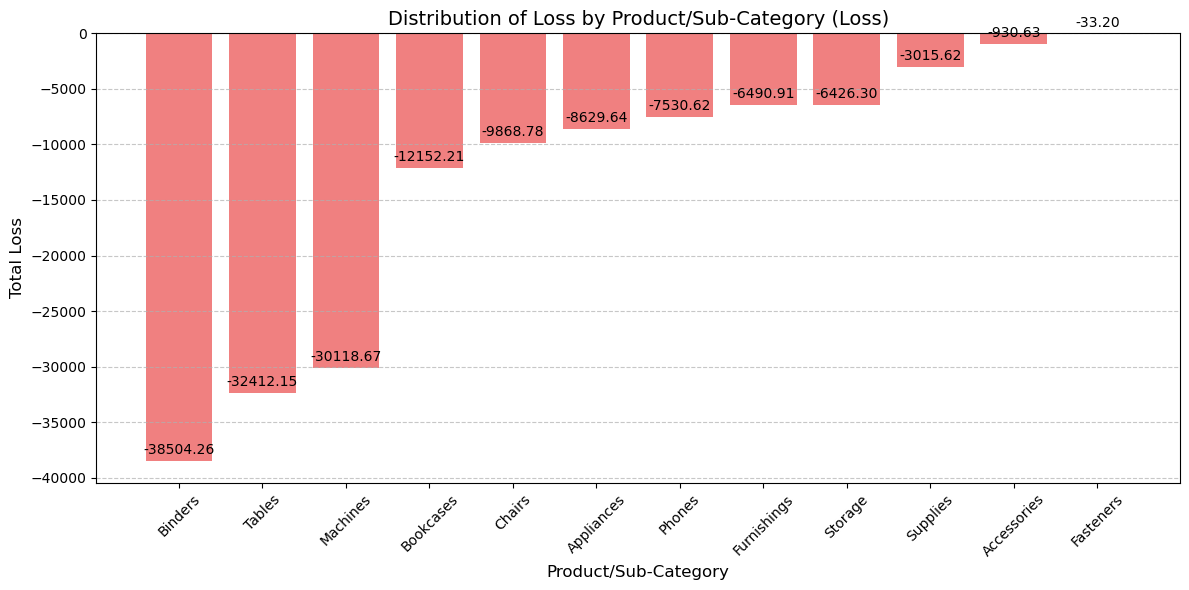

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for profit and loss separately
profit_df = df[df['Profit'] > 0]
loss_df = df[df['Profit'] < 0]

# Calculate the total profit for each product or sub-category in the profit DataFrame
profit_profits = profit_df.groupby('Sub-Category')['Profit'].sum()

# Calculate the total loss for each product or sub-category in the loss DataFrame
loss_profits = loss_df.groupby('Sub-Category')['Profit'].sum()

# Sort the profit and loss products by profit in descending order
sorted_profit_products = profit_profits.sort_values(ascending=False)
sorted_loss_products = loss_profits.sort_values(ascending=True)

# Create a bar chart for the distribution of profit by product or sub-category (Profit)
plt.figure(figsize=(12, 6))
bars_profit = plt.bar(sorted_profit_products.index, sorted_profit_products.values, color='skyblue')
plt.xlabel('Product/Sub-Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.title('Distribution of Profit by Product/Sub-Category (Profit)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with profit values
for bar in bars_profit:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Create a bar chart for the distribution of loss by product or sub-category (Loss)
plt.figure(figsize=(12, 6))
bars_loss = plt.bar(sorted_loss_products.index, sorted_loss_products.values, color='lightcoral')
plt.xlabel('Product/Sub-Category', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.title('Distribution of Loss by Product/Sub-Category (Loss)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with loss values
for bar in bars_loss:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the bar charts separately
plt.tight_layout()
plt.show()


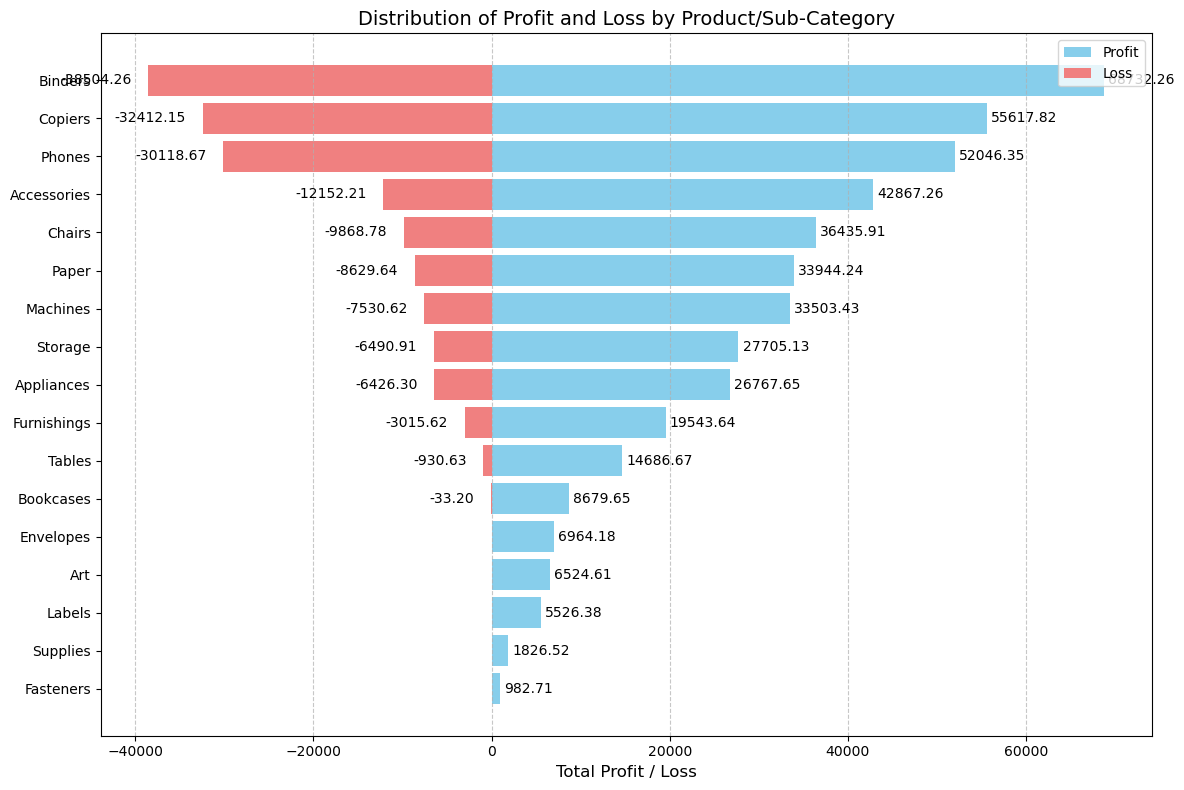

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for profit and loss separately
profit_df = df[df['Profit'] > 0]
loss_df = df[df['Profit'] < 0]

# Calculate the total profit for each product or sub-category in the profit DataFrame
profit_profits = profit_df.groupby('Sub-Category')['Profit'].sum()

# Calculate the total loss for each product or sub-category in the loss DataFrame
loss_profits = loss_df.groupby('Sub-Category')['Profit'].sum()

# Sort the profit and loss products by profit in descending order
sorted_profit_products = profit_profits.sort_values(ascending=False)
sorted_loss_products = loss_profits.sort_values(ascending=True)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Create horizontal bar charts for profit (right) and loss (left)
bars_profit = ax.barh(np.arange(len(sorted_profit_products)), sorted_profit_products.values, color='skyblue', label='Profit')
bars_loss = ax.barh(np.arange(len(sorted_loss_products)), sorted_loss_products.values, color='lightcoral', label='Loss')

# Set y-axis labels to the product/sub-category names
ax.set_yticks(np.arange(len(sorted_profit_products)))
ax.set_yticklabels(sorted_profit_products.index, fontsize=10)
ax.invert_yaxis()  # Invert the y-axis to have the highest value at the top
ax.set_xlabel('Total Profit / Loss', fontsize=12)
ax.set_title('Distribution of Profit and Loss by Product/Sub-Category', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with profit and loss values
for bar in bars_profit:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

for bar in bars_loss:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(-12, 0), textcoords='offset points', ha='right', va='center', fontsize=10)

# Add a legend
ax.legend(loc='upper right')

# Show the combined plot
plt.tight_layout()
plt.show()


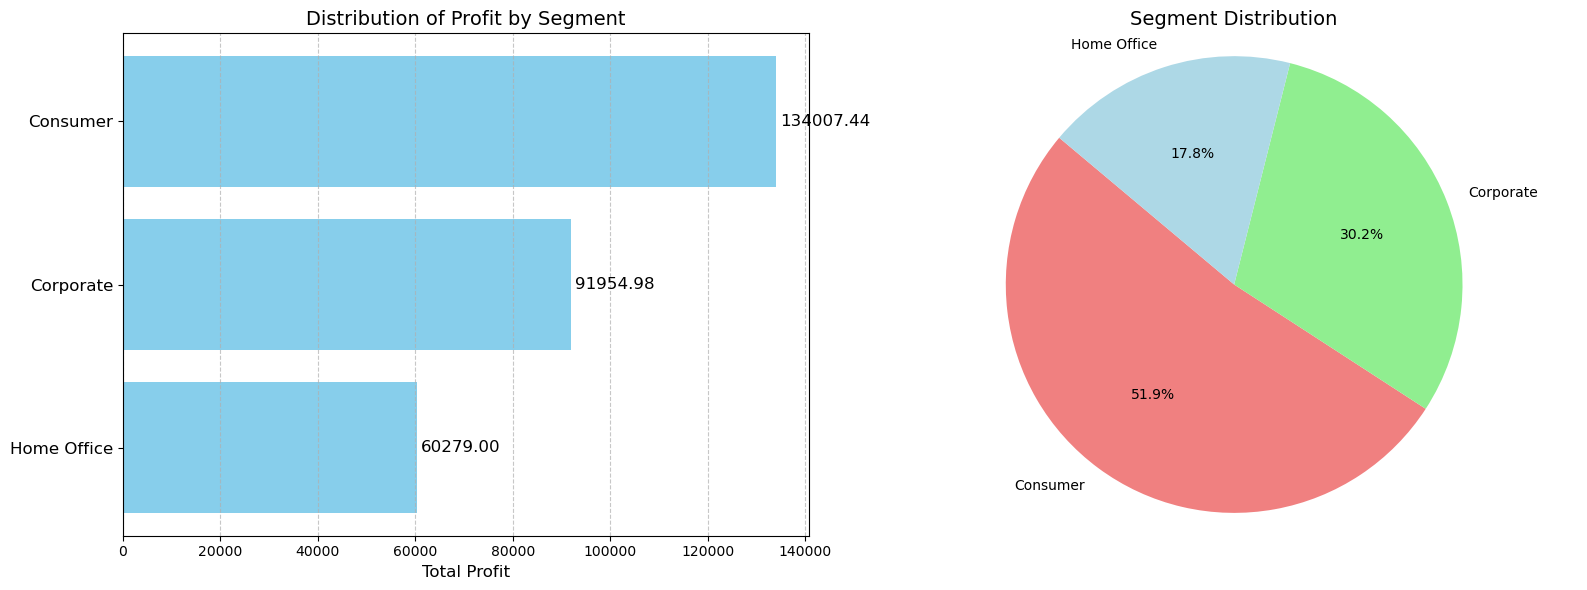

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the total profit for each segment
segment_profits = df.groupby('Segment')['Profit'].sum()

# Calculate the total loss for each segment
segment_losses = df[df['Profit'] < 0].groupby('Segment')['Profit'].sum()

# Sort the segments by profit in descending order
sorted_segment_profits = segment_profits.sort_values(ascending=False)
sorted_segment_losses = segment_losses.sort_values(ascending=True)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create horizontal bar chart for profit by segment (left subplot)
bars_segment_profit = ax1.barh(np.arange(len(sorted_segment_profits)), sorted_segment_profits.values, color='skyblue', label='Profit')
ax1.set_yticks(np.arange(len(sorted_segment_profits)))
ax1.set_yticklabels(sorted_segment_profits.index, fontsize=12)
ax1.invert_yaxis()  # Invert the y-axis to have the highest value at the top
ax1.set_xlabel('Total Profit', fontsize=12)
ax1.set_title('Distribution of Profit by Segment', fontsize=14)
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with profit values
for bar in bars_segment_profit:
    width = bar.get_width()
    ax1.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0), textcoords='offset points', ha='left', va='center', fontsize=12)

# Create a pie chart for segment distribution (right subplot)
segment_distribution = df['Segment'].value_counts()
ax2.pie(segment_distribution, labels=segment_distribution.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightblue'])
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax2.set_title('Segment Distribution', fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


NameError: name 'bar_height' is not defined

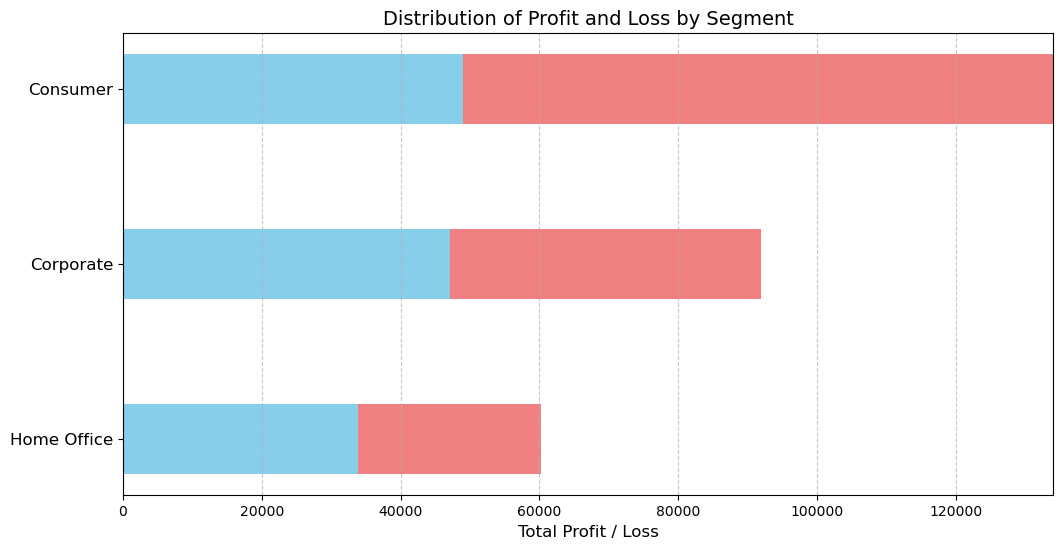

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the total profit for each segment
segment_profits = df.groupby('Segment')['Profit'].sum()

# Calculate the total loss for each segment
segment_losses = df[df['Profit'] < 0].groupby('Segment')['Profit'].sum()

# Sort the segments by profit and loss in ascending order
sorted_segment_profits = segment_profits.sort_values(ascending=False)
sorted_segment_losses = segment_losses.sort_values(ascending=True)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Create horizontal bar chart for profit (right) and loss (left)
bar_width = 0.4
index = np.arange(len(sorted_segment_profits))
bars_profit = ax.barh(index, sorted_segment_profits.values, bar_width, color='skyblue', label='Profit')
bars_loss = ax.barh(index, sorted_segment_losses.values, bar_width, color='lightcoral', label='Loss', left=sorted_segment_profits.values)

# Set y-axis labels to the segment names
ax.set_yticks(index)
ax.set_yticklabels(sorted_segment_profits.index, fontsize=12)
ax.invert_yaxis()  # Invert the y-axis to have the highest value at the top
ax.set_xlabel('Total Profit / Loss', fontsize=12)
ax.set_title('Distribution of Profit and Loss by Segment', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with profit and loss values
for bar in bars_profit:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar_height / 2),
                xytext=(3, 0), textcoords='offset points', ha='left', va='center', fontsize=12)

for bar in bars_loss:
    width = bar.get_width()
    ax.annotate(f'{abs(width):.2f}', xy=(width, bar.get_y() + bar_height / 2),
                xytext=(-12, 0), textcoords='offset points', ha='right', va='center', fontsize=12)

# Add a legend
ax.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


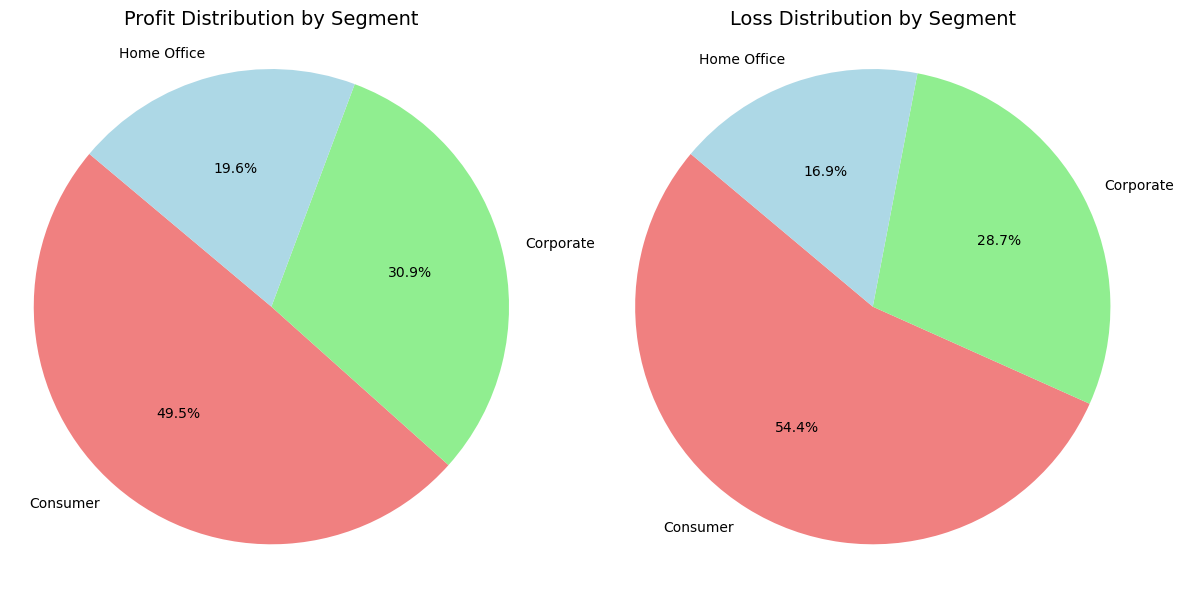

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for profit and loss separately
profit_df = df[df['Profit'] > 0]
loss_df = df[df['Profit'] < 0]

# Calculate the total profit for each segment
profit_segment_profits = profit_df.groupby('Segment')['Profit'].sum()

# Calculate the total loss for each segment
loss_segment_losses = loss_df.groupby('Segment')['Profit'].sum().abs()

# Create two subplots for profit and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a pie chart for profit by segment
ax1.pie(profit_segment_profits, labels=profit_segment_profits.index, autopct='%1.1f%%', startangle=140,
        colors=['lightcoral', 'lightgreen', 'lightblue'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title('Profit Distribution by Segment', fontsize=14)

# Create a pie chart for loss by segment
ax2.pie(loss_segment_losses, labels=loss_segment_losses.index, autopct='%1.1f%%', startangle=140,
        colors=['lightcoral', 'lightgreen', 'lightblue'])
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax2.set_title('Loss Distribution by Segment', fontsize=14)

# Show the pie charts
plt.tight_layout()
plt.show()
